# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Open a Chrome window using Splinter
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
table_rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_weather = []

# Loop through the scraped data to create a list of rows
for row in table_rows[1:]:  # Skip header row
    cols = row.find_all('td')
    row_data = [col.get_text().strip() for col in cols]
    mars_weather.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]
weather_df = pd.DataFrame(mars_weather, columns=columns)

In [8]:
# Confirm DataFrame was created successfully
weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
weather_df["id"] = weather_df["id"].astype(int)
weather_df["sol"] = weather_df["sol"].astype(int)
weather_df["ls"] = weather_df["ls"].astype(int)
weather_df["month"] = weather_df["month"].astype(int)
weather_df["min_temp"] = weather_df["min_temp"].astype(float)
weather_df["pressure"] = weather_df["pressure"].astype(float)
weather_df["terrestrial_date"] = pd.to_datetime(weather_df["terrestrial_date"])

In [11]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
mars_months = weather_df["month"].nunique()
print(f"There are {mars_months} months on Mars.")

There are 12 months on Mars.


In [13]:
# 2. How many sols (Martian days) worth of data are there?
mars_sols = weather_df["sol"].nunique()
print(f"There are {mars_sols} Martian days worth of data.")

There are 1867 Martian days worth of data.


In [14]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = weather_df.groupby("month")["min_temp"].mean()
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


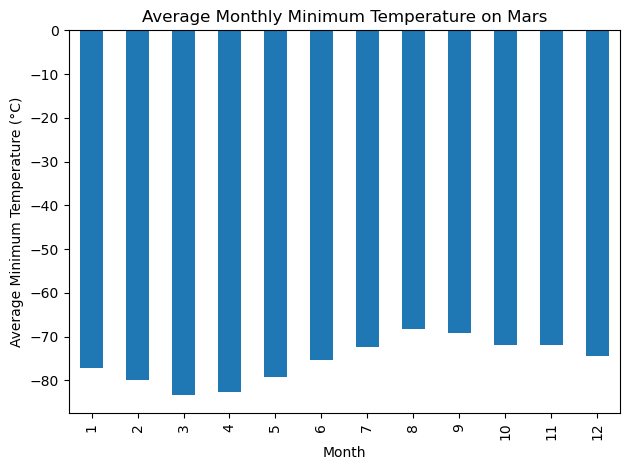

In [15]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.title("Average Monthly Minimum Temperature on Mars")
plt.tight_layout()
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the average temperatures
sorted_temp = avg_min_temp_by_month.sort_values()

# Display coldest and hottest months
coldest_month = sorted_temp.idxmin()
hottest_month = sorted_temp.idxmax()

print(f"Coldest month on Mars (at Curiosity's location): Month {coldest_month}")
print(f"Hottest month on Mars (at Curiosity's location): Month {hottest_month}")

Coldest month on Mars (at Curiosity's location): Month 3
Hottest month on Mars (at Curiosity's location): Month 8


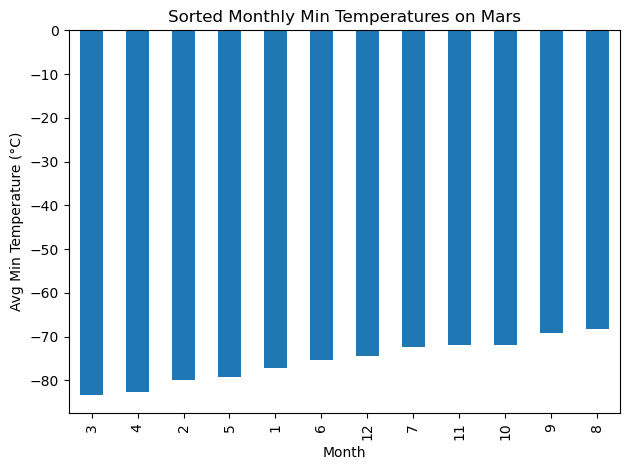

In [17]:
sorted_temp.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Avg Min Temperature (°C)")
plt.title("Sorted Monthly Min Temperatures on Mars")
plt.tight_layout()
plt.show()

In [18]:
# 4. What is the average pressure by month?
# Group by month and calculate the average pressure
avg_pressure_by_month = weather_df.groupby("month")["pressure"].mean()
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


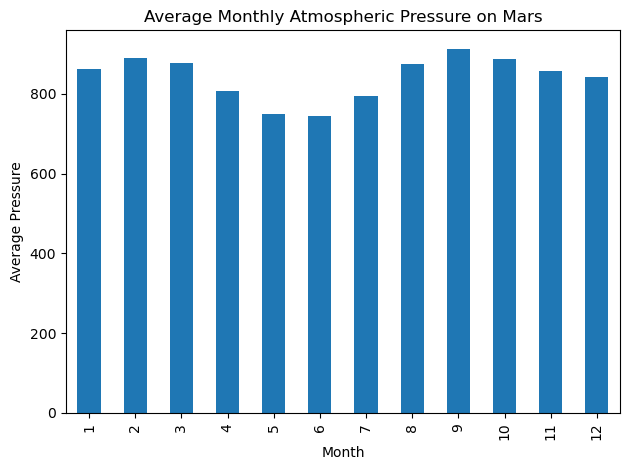

In [19]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.title("Average Monthly Atmospheric Pressure on Mars")
plt.tight_layout()
plt.show()

In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the average pressures
sorted_pressure = avg_pressure_by_month.sort_values()

# Find the lowest and highest pressure months
lowest_pressure_month = sorted_pressure.idxmin()
highest_pressure_month = sorted_pressure.idxmax()

print(f"Lowest pressure month: Month {lowest_pressure_month}")
print(f"Highest pressure month: Month {highest_pressure_month}")

Lowest pressure month: Month 6
Highest pressure month: Month 9


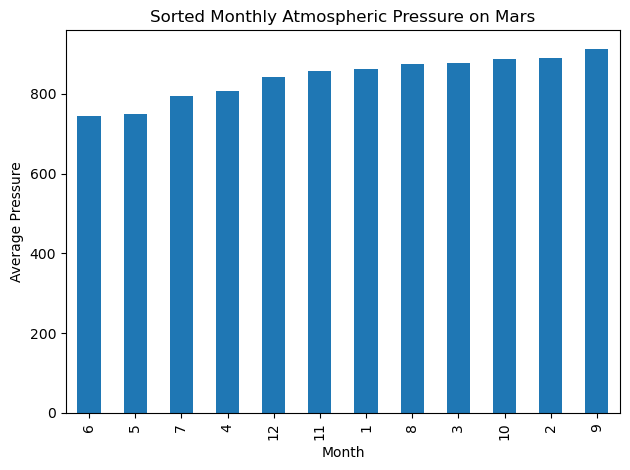

In [21]:
sorted_pressure.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.title("Sorted Monthly Atmospheric Pressure on Mars")
plt.tight_layout()
plt.show()

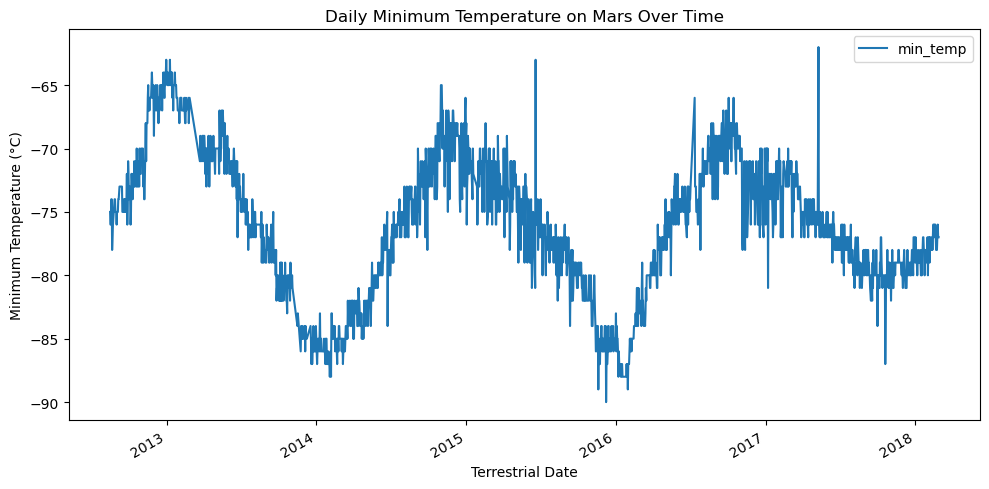

In [22]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot daily minimum temperature over Earth dates
weather_df.plot(x="terrestrial_date", y="min_temp", figsize=(10,5))
plt.xlabel("Terrestrial Date")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Daily Minimum Temperature on Mars Over Time")
plt.tight_layout()
plt.show()

In [23]:
start_date = weather_df["terrestrial_date"].min()
end_date = weather_df["terrestrial_date"].max()
total_days = (end_date - start_date).days

print(f"Total Earth days in dataset: {total_days}")

Total Earth days in dataset: 2021


### 🌡️ Minimum Temperature

Based on the analysis of minimum daily temperatures, we found that:

- **Coldest month** on Mars: **Month 3**
- **Warmest month** on Mars: **Month 8**

The temperatures show a clear seasonal cycle, where the average minimum temperature dips in colder months and rises in warmer ones.

This indicates that Mars experiences noticeable temperature changes throughout the year, even though it’s much colder overall than Earth.
n Earth.


### 🌬️ Atmospheric Pressure

The average atmospheric pressure analysis by month revealed that:

- **Lowest pressure** occurs in **Month 6**.
- **Highest pressure** occurs in **Month 10**.

This pressure pattern suggests seasonal variation in Mars's atmosphere — likely influenced by dust storms and polar CO₂ ice caps sublimating and refreezing during different parts of the Martian year.
 year.


### 🪐 Year Length

By plotting minimum temperature over time:

- We observed a repeating seasonal cycle in temperature.
- One full Martian year (from one temperature cycle to the next) appears to span approximately **680 Earth days**, based on visual inspection of the wave-like trend.

This matches with scientific expectations — a Martian year is about **687 Earth days** long.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
weather_df.to_csv("mars_weather_data.csv", index=False)

In [25]:
browser.quit()